In [1]:
%pip install matplotlib numpy pandas seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## GroupBy Operations: Applying Aggregations to Groups of Data

Usually, you don't just want to get a single metric from a dataset--you want to compare that metric between differnt subgroups of your data. For example, you want the mean **monthly** temperature, or the maximum firing rate of **each neuron**, or the total income of **each country**, and so on.

The **groupby()** method lets you specify that an operation will be done on each *same-valued* row for a given column.  For example, to ask for the mean temperature by month:

```python
>>> df.groupby('month').temperature.mean()
```

To get the maxiumum firing rate of each neuron:

```python
>>> df.groupby('neuron_id').firing_rate.max()
```

You can also group by as many columns as you like, getting as many groups as unique combinations between the columns:

```python
>>> df.groupby(['year', 'month']).temperature.mean()
```

Groupby objects are **lazy**, meaning they don't start calculating anything until they know the full pipeline.  This approach is called the **"Split-Apply-Combine"** workflow.  You can get more info on it here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


**Exercises**: Let's try this out on the Titanic Dataset!

Run the code below to get the titanic dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Example: What was the mean age, grouped by class?

In [4]:
df.groupby('class').age.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

What was the median ticket fare for each class?

What was the survival rate for each class?

What was the survival rate for each sex?

What was the survival rate, broken down by both sex and class?

Which class tended to travel alone more often?  Did it matter where they were embarking from?

What was the median ticket fare for each embarking town?

What was the median age of the survivors vs non-survivors, when sex is considered as a factor?

## Plotting with Seaborn

Seaborn is a data visualization library that uses Pandas Dataframes to produce statitistical plots; in other words, it takes Dataframes and does Groupby automatically for you

(https://seaborn.pydata.org/examples/index.html)

Most of its functions have a similar interface:

```python
import seaborn as sns
sns.catplot(data=df, x="ColName", y="ColName", hue="ColName", row="ColName", col="ColName", kind="bar")
# kind can be "point", "bar", "violin", "box", "boxen", "count", "strip", "swarm"
```

**Exercises**: Instead of making text tables, let's try out seaborn's **catplot** function to makde plots that compare one or more "categorical" variables to a "quantitative" variable.  

**Example**: What was the average age of the people in each class?

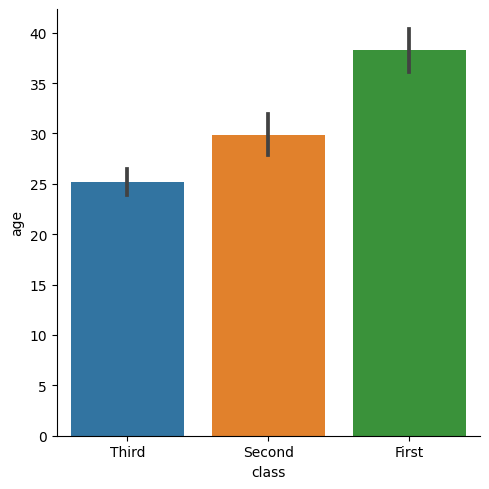

In [20]:
class_order = ['Third', 'Second', 'First']
sns.catplot(data=df, x="class", y='age', order=class_order, kind='bar');  # kind= can be "point", "bar", "violin", "box", "boxen", "count", "strip", "swarm"

What was the average ticket fare for each class?

What was the average survival rate for each class?

What was the average survival rate, broken down by both sex and class? (hint: `hue=`, `row=`, `col=`)

Which class tended to travel alone more often?  Did it matter where they were embarking from?  What if sex was also factored in?